## BMIS-2542: Data Programming Essentials with Python 
##### Katz Graduate School of Business, Fall 2019


## Session-4: Data Wrangling  with Pandas

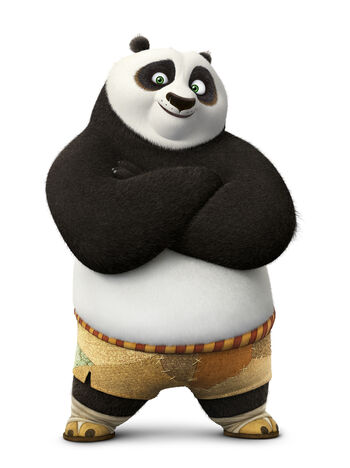

In [ ]:
import pandas as pd
import numpy as np

Pandas has two workhorse data structures: **Series** and **DataFrame**.

## Series

A series is a one-dimensional array-like object containing a sequence of values and an associated array of data labels, called its index.

In [ ]:
mySeries = pd.Series([4, 7, -5, 3])
mySeries

In [ ]:
# Often, it is desirable to create a Series with an index identifying each data point with a label.
mySeries2 = pd.Series([4, 7, -5, 3], index= ['a','b', 'c','d'] )
mySeries2

In [ ]:
# A Series can also be created by passing a dictionary
seriesDict = {'Ohio':35000, 'Texas':71000,'Oregon':16000,'Utah':5000}
mySeries3 =  pd.Series(seriesDict)
mySeries3

In [ ]:
# selecting values
mySeries3['Texas']

In [ ]:
mySeries3[(mySeries3>5000) & (mySeries3<70000)]

In [ ]:
#dealing with panda use bitwise opeartor not boiolean as the panda work with integer arrays

## DataFrame

The most common method to create a `DataFrame` is from a dictionary of equal-length lists.<br>
Each entry in the dictionary contains the column name and the values associated with it in the form of a list.<br>
Columns in the `DataFrame` can be arranged at construction time by entering a keyword **columns** with a list of the names of the columns ordered as we want.<br>
The index of each row is created automatically, taking the position of its elements inside the entry lists, starting from 0.

In [ ]:
data = {'state' : ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year' : [2000, 2001, 2002, 2001, 2002, 2003],
        'population' : [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
dataFrame = pd.DataFrame(data)
# dataFrame = pd.DataFrame(data, columns = ['year', 'state', 'population'])
dataFrame

In [ ]:
#Here is another one
dictFootball = {'year': [2010, 2011, 2010, 2011, 2010, 2011],
                'team': ['FCBarcelona', 'FCBarcelona', 'RMadrid', 'RMadrid', 'ValenciaCF',
                         'ValenciaCF'],
                'wins':   [30, 28, 29, 32, 21, 17],
                'draws':  [6, 7, 5, 4, 8, 10],
                'losses': [2, 3, 4, 2,  9, 11]
               }
football = pd.DataFrame(dictFootball, columns=['year', 'team', 'wins', 'draws', 'losses'])
football

In [ ]:
football.dtypes # read more here: https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dtypes

In [ ]:
football['draws'].dtype

In [ ]:
football['draws'] = football['draws'].astype(float)
football

In [ ]:
#type casting

In [ ]:
football['draws'].dtype

In [ ]:
football.dtypes

## <mark>Reading Tabular Data</mark>

Let's use the [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult) for our example analysis. A CSV (comma separated values) file based on this dataset is available on CourseWeb. Download it to your Jupyter directory. 

We can read csv files into a `DataFrame` by calling the [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv) method in Pandas. In addition to the `path` to the file, we add the `na_values` key argument to this method along with the character that represents "not-available data" in the file. <br>CSV files usually come with a header that contains the column names. If this is the case, we can use the `usecols` parameter to select which columns in the file we will use.

In [ ]:
dfAdults = pd.read_csv('adult.csv', na_values= '?', usecols=['age','workclass','fnlwgt','education','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income_class'])
dfAdults

**NOTE**: In addition to reading CSV files, Pandas also has functions for reading files in other formats such as Excel, HDF5, tabulated files or even the content from the clipboard (read_excel(), read_hdf(), read_table(), read_clipboard()). Upon reading the contect, every such function returns a `DataFrame`. You can read more about these functions [here](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

In [ ]:
# you can write a DataFrame to a file. The output file is stored in your current working  directory.
dfAdults.to_csv('AdultDataFrame.csv', index = False, na_rep = '?')

In [ ]:
# Get DataFrame size
dfAdults.shape

In [ ]:
dfAdults.head(10) # Returns the first five rows. Can pass the number of rows we need to view as an argument.

In [ ]:
dfAdults.tail() # Returns the last 5 rows

In [ ]:
# Get all the columns in the DataFrame as a list. 
list(dfAdults)

In [ ]:
list(dfAdults.columns)

In [ ]:
# Quickly describe the dataframe
dfAdults.describe()

### Selection and Filtering

In [ ]:
# A column in a DataFrame can be retrieved as a Series, using dict/list/attribute-like notation 
dfAdults['education']

In [ ]:
dfAdults.education # attribute like notation

In [ ]:
type(dfAdults.education)

In [ ]:
dfAdults[['age', 'race']]

In [ ]:
# selecting specific rows
dfAdults[5:10]

In [ ]:
dfAdults[:2]

In [ ]:
dfAdults.education.unique() # get the unique values in the 'education' column

In [ ]:
# you can filter out rows based on certain conditions
masters = dfAdults[dfAdults.education == 'Masters']
masters

In [ ]:
wgt = dfAdults[dfAdults.fnlwgt>85000]
wgt

### Selection using `loc`
You can use `loc` to select a subset of rows and columns.

In [ ]:
dfAdults.loc[2:10]

In [ ]:
dfAdults.loc[2:10, ['age','sex']] # note the selected list of columns: age and sex

    #10 is inluded

In [ ]:
dfAdults.loc[2:10, 'age':'sex'] # note the range of columns selected: age-->sex

In [ ]:
dfAdults.loc[dfAdults.education=='Masters', 'age':'sex']

### Exercise
1. Select all Females who work for the Federal Government (work class column), but from countries other than the United States
2. Select all who have a Bachelors degree or who earn more than 50K
3. Get the education level and the income class of all people who are never-married.

In [ ]:
list(dfAdults)

In [ ]:
dfAdults.marital_status.unique()

In [ ]:
dfAdults.education.unique()

In [ ]:
dfAdults.income_class.unique()

In [ ]:
dfAdults.sex.unique()

In [ ]:
dfAdults.workclass.unique()

In [ ]:
dfAdults.native_country.unique()

In [ ]:
masters = dfAdults[(dfAdults.sex == 'Female')& (dfAdults.workclass == 'State-gov')& (dfAdults.native_country != 'United-States')]
masters

In [ ]:
adulyts = dfAdults[(dfAdults.education=='Bachelors')| (dfAdults.income_class == '>50K')]

In [ ]:
neverMarried = dfAdults.loc[(dfAdults.marital_status == 'Never-married'),['income_class','education']]
neverMarried

### Creating/Removing Columns

In [ ]:
# assigning a column that doesn't exist will create a new column. 
# Let's create the new column 'test_column'
dfAdults['test_column'] = 10000
dfAdults.head()

In [ ]:
dfAdults['prod'] = dfAdults.age * dfAdults.fnlwgt
dfAdults.head()

In [ ]:
# Let's create a new column ("from_US") of boolean values that contains True if the native_country is United-States
dfAdults['from_US'] = dfAdults.native_country == 'United-States'
dfAdults.head(10)

In [ ]:
dfAdults['from_US'] = dfAdults['from_US'].astype('int64')
dfAdults.head()

In [ ]:
# create new column by discretization/binning
ages = dfAdults['age']
bins = [0,30,60,100]
bin_names = ['Youth', 'MiddleAged', 'Senior']

dfAdults['age_category'] = pd.cut(ages,bins,labels=bin_names)
dfAdults

In [ ]:
#Segmenting existing sheet using next categ var

In [ ]:
# remove a column using the del function. Let's remove the newly created test_column
del dfAdults['test_column']
dfAdults.head()

In Pandas, the functions that change the contents of a `DataFrame`, will normally return a copy of the modified data, instead of overwriting the original `DataFrame`. Therefore, if you do not want to keep the old values, you can set the keyword `inplace` to `True`. By default, this keyword is set to `False`, meaning that a copy of the data is returned. 

In [ ]:
# Let's remove the column "from_US" using the drop method
dfAdults.drop(columns=['from_US']) 
dfAdults.head() # note that 'from_US' column is still there in dfAdults after the drop

In [ ]:
# Let's remove the column "from_US" using the drop method and inplace=True
dfAdults.drop(columns=['from_US'], inplace=True) # Alternatively, drop('from_US', axis = 1) 
dfAdults.head()

if we want to remove a row, we can use the `drop` function. We need to specify the index of the row we want to remove. 

In [ ]:
# drop rows by index
dfAdults.drop([0,1], inplace=True)
dfAdults.head()

## <mark>Summarizing and Computing Descriptive Statistics</mark>
The following list shows the most common aggregation functions available.

| Function  | Description | 
|-----------|-------------|
| count()   |Number of not-null observations|  
| sum()     |Sum of values|
| mean()    |Mean of values            | 
| median()  |Arithmetic median of values             |
| min()     |Minimum|
| max()     |Maximum|
| prod()    |Product of values|
| std()     |Unbiased standard deviation|
| var()     |Unbiased variance|

If a function is applied to a `DataFrame` or a selection of rows and columns, then you can specify if the function should be applied to the rows for each column  (putting the **axis=0** keyword on the invocation of the function), or it should be applied on the columns for each row (putting the **axis=1** keyword on the invocation of the function).

In [ ]:
# Maximum value of fnlwgt column
dfAdults.fnlwgt.max() 

In [ ]:
# Row-wise Max: Maximum value of each column across all rows (axis = 0)
dfAdults.max(axis = 0)

In [ ]:
#o means row wise 1 column wise

In [ ]:
dfMales = dfAdults[dfAdults.sex == 'Male'] 
dfFemales = dfAdults[dfAdults.sex == 'Female'] 
dfMalesHighIncome = dfAdults[(dfAdults.sex == 'Male') & (dfAdults.income_class=='>50K')] 
dfFemalesHighIncome = dfAdults[(dfAdults.sex == 'Female') & (dfAdults.income_class=='>50K')] 
dfHighIncome = dfAdults[dfAdults.income_class=='>50K']

print('The % of people with high income:', int(len(dfHighIncome)/len(dfAdults)*100), '%.') 
print('The % of men with high income:', int(len(dfMalesHighIncome)/len(dfMales)*100), '%.') 
print('The % of women with high income:', int(len(dfFemalesHighIncome)/len(dfFemales)*100), '%.') 
print('The average age of men:', dfMales['age'].mean(), '.') 
print('The average age of women:', dfFemales['age'].mean(), '.')
print('The average age of high-income men:', dfMalesHighIncome['age'].mean(), '.') 
print('The average age of high-income women:', dfFemalesHighIncome['age'].mean(), '.')

In [ ]:
male_mu = dfMales['age'].mean()
female_mu = dfFemales['age'].mean()
male_var = dfMales['age'].var()
female_var = dfFemales['age'].var()
male_std = dfMales['age'].std()
female_std = dfFemales['age'].std()
print('Statistics of age for Men: mu:', male_mu, 'var:', male_var, 'std:', male_std)
print('Statistics of age for Women: mu:', female_mu, 'var:', female_var, 'std:', female_std)

In [ ]:
male_median=dfMales['age'].median()
female_median= dfFemales['age'].median()
print ("Median Age for Men and Women: ", male_median, female_median)

In [ ]:
dfAdults.hours_per_week.quantile(0.1) # 10th percentile

In [ ]:
# Correlation
dfAdults.age.corr(dfAdults.fnlwgt)

In [ ]:
# Covariance
dfAdults.age.cov(dfAdults.fnlwgt)

### Function Application
We can apply operations over all the values in rows, columns or a selection of both. The rule of thumb is that an operation a column means that it is applied to each row in that column and an operation on a row means that it is applied to each column in that row.

In [ ]:
s = dfAdults['fnlwgt'] / 1000
s.head()

We can also apply any function to a `DataFrame` or `Series` just by passing its name as argument of the `apply` method. <br>For example, in the following code, we apply the `sqrt` function from the *numpy* library to perform the square root of each value in the *`fnlwgt`* column.

In [ ]:
dfAdults['sqrt_weight'] = dfAdults['fnlwgt'].apply(np.sqrt)
dfAdults.head()

In [ ]:
#np all number operations 

If we need to design a specific function to apply, we can write an in-line function, commonly known as a $\lambda$-function (lambda). A $\lambda$-function is a function without a name (annonymous function). It is only necessary to specify the parameters it receives, between the **lambda**  keyword and the **:**. In the next example, only one parameter is needed, which will be the value of each element in the *'fnlwgt'* column. The value the function returns will be the square of that value.

In [ ]:
dfAdults['weight_2'] = dfAdults['fnlwgt'].apply(lambda d: d**2)
dfAdults.head()

### Sorting
A `DataFrame` can be sorted using any column, using the `sort` function.  Let's view the first five rows of data sorted in the descending order (i.e., from the largest to the smallest values) of the *`fnlwgt`* column:

In [ ]:
dfNew = dfAdults.sort_values(by='fnlwgt')
dfNew.head()

In [ ]:
dfAdults.sort_values(by='fnlwgt', inplace=True)
dfAdults

If we want to return to the original order, we can sort by an index using the **sort_index** function and specifying **axis=0**:

In [ ]:
dfAdults.sort_index(axis=0, ascending=True, inplace=True)
dfAdults.head()

In [ ]:
#very imp ctrl z

### Grouping
Another way to inspect data is to group it according to some criteria. Pandas has the `groupby` function that allows us to do just that. The value returned by this function is a special grouped data frame. To have a proper `DataFrame` as a result, it is necessary to apply an aggregation function. Thus, this function will be applied to all the values in the same group.

For example, in our case, if we want a `DataFrame` showing the average hours per week  for each `age_category`, we can obtain it by grouping according to `age_category` and using the mean function as the aggregation method for each group. The result would be  a DataFrame with age categories as indexes and the mean values as the column:

In [ ]:
# Compute average hours per week and average weight of each age category
AvgHoursByAgeCategory = dfAdults.groupby('age_category')[['hours_per_week', 'fnlwgt']].mean()
AvgHoursByAgeCategory

In [ ]:
# Number of people by Marital Status 
countByMaritalStatus = dfAdults.groupby('marital_status')[['age']].count()
countByMaritalStatus.rename(columns={'age': 'count'}, inplace=True) # Rename age column to reflect count
countByMaritalStatus

### Exercise
Compute the maximum age of the adults for each country and gender. (i.e., should produce two records for each country - one for males and one for females) 

## <mark>Rearranging Data</mark>
### Pivot Tables
We can rearrange our data, redistributing the indexes and columns for better manipulation of data, which normally leads to better performance. We can do this by using the `pivot_table` function. Here, we can specify which columns will be the new indexes, the new values and the new columns. 

For example, imagine that we want to transform our `DataFrame` to a spreadsheet-like structure with the native_country as the index, while the columns will be the age categories and the values will be the average hours per week. To do this, first we need to filter out the data and then pivot it in this way:

In [ ]:
pivotTable = pd.pivot_table(dfAdults, values='hours_per_week',
                            index=['native_country'], columns=['age_category'], aggfunc = np.mean)
pivotTable

Now we can use the new index to select specific rows by label, using the `loc` operator.

In [ ]:
pivotTable.loc[['China', 'Canada'], ['Youth', 'Senior']]

### Cross-Tabulations: Crosstab
A crosstab is a special case of a pivot table that computes group frequencies.

In [ ]:
# group frequencies by country and gender
pd.crosstab(dfAdults.native_country, dfAdults.sex, margins=True)

### Exercise
Use a crosstab to show group frequencies for each marital status (columns), by country and gender.

## <mark>Handling Missing Data</mark>
For this section we will use the **soybean.csv** dataset.<br>
First, let's load the data into a `DataFrame` and observe the loaded data.

In [ ]:
dfSoy = pd.read_csv('soybean.csv', na_values = '?')
dfSoy

In [ ]:
dfSoy.shape


Pandas uses the special value `NaN` (not a number) to represent missing values. In Python, `NaN` is a special floating-point value returned by certain operations when one of their results ends in an undefined value. A subtle feature of `NaN` values is that two `NaN` are never equal. Because of this, the only safe way to tell whether or not a value is missing in a DataFrame is by using the `isnull()` function. Thus, this function can be used to filter rows with missing values.

In [ ]:
# get rows with 'Severity' column null
dfSoy[dfSoy.severity.isnull()]

### Filtering Out Missing Data

In [ ]:
anyNansRowsDropped = dfSoy.dropna() # dropna() by default drops any row containing missing values
anyNansRowsDropped.shape

In [ ]:
allNansRowsDropped = dfSoy.dropna(how = 'all') # setting how='all' will drop rows with values missing for all the columns
allNansRowsDropped.shape

In [ ]:
# Let's create a new column with values missing for all the rows
dfSoy['test'] = np.NAN
dfSoy.shape

In [ ]:
dfSoy.head()

In [ ]:
# Drop columns with values missing in every row
allNanColsDropped = dfSoy.dropna(axis = 1, how = 'all')
print(allNanColsDropped.shape)
allNanColsDropped.head()

In [ ]:
# when you want to handle the above operations on the same dataframe, use inplace=True
dfSoy = pd.read_csv('soybean.csv', na_values = '?')
print('Original Size:', dfSoy.shape)

dfSoy.dropna(how = 'all', inplace=True)
print('Size After Dropping Rows with NaN in All Columns:', dfSoy.shape)

dfSoy.dropna(how = 'any', inplace=True)
print('Size After Dropping Rows with NaN in any Column:', dfSoy.shape)

### Filling in Missing Data
Rather than filtering out missing data, you may want to fill in the holes in various ways. **fillna** is the workhorse function for this.

In [ ]:
# Load Data
dfSoy = pd.read_csv('soybean.csv', na_values = '?')
print('Original Size:', dfSoy.shape)

In [ ]:
# Calling fillna with a constant replaces missing data with that value
dfSoy.fillna(100, inplace=True) # replace all missing fields with 100
dfSoy.dropna(how='any', inplace=True)
dfSoy.shape

In [ ]:
# Calling fillna() with a dict, you can use a different fill value for each column
dfSoy = pd.read_csv('soybean.csv', na_values = '?')
dfSoy.fillna({'precip' : 100, 'temp':200}, inplace=True)
dfSoy

In [ ]:
# you may want to fill missing values with associated means or medians
dfSoy = pd.read_csv('soybean.csv', na_values = '?')
dfSoy.fillna({'precip' : dfSoy['precip'].mean(), 'temp':dfSoy['temp'].median()}, inplace=True)
dfSoy

### Handling Duplicates and Data Transformations

In [ ]:
# Removing Duplicates
dfSoy = pd.read_csv('soybean.csv', na_values = '?')
print('Original Size', dfSoy.shape)
dfSoy.drop_duplicates(inplace=True)
print('Size After Dropping Duplicates', dfSoy.shape)

In [ ]:
# Replacing Values. If the class is "herbicide-injury", replace it with "new_class". Can use a dict to specify new values for multiple columns
dfSoy[dfSoy['class']=='herbicide-injury']

In [ ]:
dfSoy.replace({'class':'herbicide-injury'}, value = {'class':'new_class'}, inplace=True)
dfSoy[dfSoy['class']=='herbicide-injury']

In [ ]:
dfSoy[dfSoy['class']=='new_class']

## <mark>Combining and Merging Datasets</mark>
Data may be spread across a number of files or databases or be arranged in a form that is not easy to analyze. This section focuses on tools to combine and join data.<br><br>
Data contained in pandas objects can be combined in a number of ways:
 - **pandas.merge**: connects rows in DataFrames based on one or more keys (similar to database joins)
 - **pandas.concat**: concatenates or "stacks" together objects along an axis

### Database-Style DataFrame Joins
Merge or join operations combine datasets by linking rows using one or more keys.

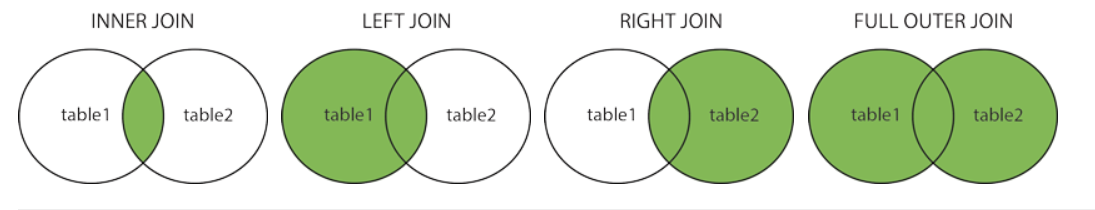
[<center>Source</center>](https://www.w3schools.com/sql/sql_join.asp)

In [ ]:
dfCustomers = pd.DataFrame({'customer_id':[1,2,3], 'name':['Anne', 'Bill', 'Charolette']})
dfCustomers

In [ ]:
dfOrders = pd.DataFrame({'order_id':[1,2,3,4], 'customer_id':[2,2,1,5], 'value':[1000,2000,3000,4000]})
dfOrders

By default, `merge` does an inner join. The keys in the result are the intersection or the common set found on both tables. Other possible options are `left`, `right`, and `outer` joins.

In [ ]:
dfMerged = pd.merge(dfOrders, dfCustomers, on='customer_id')
dfMerged

In [ ]:
dfMergedLeft = pd.merge(dfOrders, dfCustomers, on='customer_id', how='left')
dfMergedLeft

In [ ]:
dfMergedRight = pd.merge(dfOrders, dfCustomers, on='customer_id', how='right')
dfMergedRight

In [ ]:
dfMergedOuter = pd.merge(dfOrders, dfCustomers, on='customer_id', how='outer')
dfMergedOuter

In [ ]:
# Suppose the Customer Name column of the Customers DataFrame is "c_id" instead of "customer_id"
dfCustomers2 = pd.DataFrame({'c_id':[1,2,3], 'name':['Anne', 'Bill', 'Charolette']})
dfCustomers2

In [ ]:
# If the merging column names are different, they can be specified separately using "left_on" and "right_on" parameters
dfMergedDiff = pd.merge(dfOrders, dfCustomers2, left_on ='customer_id', right_on = 'c_id')
dfMergedDiff

In [ ]:
dfMergedDiffLeft = pd.merge(dfOrders, dfCustomers2, left_on ='customer_id', right_on = 'c_id', how="left")
dfMergedDiffLeft

### Merging with Multiple Keys

In [ ]:
leftTable = pd.DataFrame({'key1':['foo', 'foo','bar'], 'key2':['one', 'two', 'one'], 'left_val':[1,2,3]})
rightTable = pd.DataFrame({'key1':['foo', 'foo','bar','bar'], 'key2':['one', 'one', 'one','two'], 'right_val':[4,5,6,7]})

In [ ]:
leftTable

In [ ]:
rightTable

In [ ]:
pd.merge(leftTable, rightTable, on=['key1', 'key2'])

In [ ]:
dfLeft = pd.DataFrame({'key1':['foo', 'foo','bar'], 'key2':['one', 'two', 'one'], 'left_val':[1,2,3]})
dfRight = pd.DataFrame({'key3':['foo', 'foo','bar','bar'], 'key4':['one', 'one', 'one','two'], 'right_val':[4,5,6,7]})

In [ ]:
dfLeft

In [ ]:
dfRight

Let's merge `dfLeft` and `dfRight` by an inner join on `dfLeft.key1 = dfRight.key3` and `dfLeft.key2 = dfRight.key4` 

In [ ]:
pd.merge(dfLeft, dfRight, left_on=['key1', 'key2'], right_on=['key3', 'key4'])

### Exercise
Use the DataFrame merge function to answer the following questions:
1. How many shares of S1 does Anne hold?
2. How many shares of Yahoo does John hold?

In [ ]:
dfInvestors = pd.DataFrame({'INo':['I1', 'I2', 'I3'],'IName':['Anne', 'John', 'Elizabeth'],'PhoneNo':['412-456-4567', '585-673-4572', '763-567-8953']})
dfSecurities =  pd.DataFrame({'SNo':['S1', 'S2', 'S3', 'S4', 'S5', 'S6'], 'SName':['Microsoft', 'Kodak', 'IBM','Xerox', 'Amazon', 'Yahoo'], 'Price':[78, 45, 68, 123, 34,78]})
dfHoldings = pd.DataFrame({'INo':['I1','I1','I1','I1','I2','I2','I3','I3','I3'],'SNo':['S1','S2','S3','S4','S2','S6','S1','S3','S4'],'Qty':[500, 2000, 90,200,917,324,1000,346,780]})

In [ ]:
dfInvestors

In [ ]:
dfSecurities

In [ ]:
dfHoldings

### Concatenating Along an Axis

In [ ]:
# Combine two DataFrames with identical columns
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.concat([df1, df2])

In [ ]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']], columns=['letter', 'number', 'animal'])
df3

In [ ]:
# Combine DataFrame objects with overlapping columns and return everything. 
# Columns outside the intersection will be filled with NaN values.
pd.concat([df1, df3], sort=False, ignore_index=True)

In [ ]:
# Combine DataFrame objects with overlapping columns and return only those that are shared 
pd.concat([df1, df3], join="inner", ignore_index=True)

In [ ]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],  columns=['animal', 'name'])
df4

In [ ]:
# Combine DataFrame objects horizontally, by specifying the axis
pd.concat([df1, df4], axis=1)

## <mark>Computing Dummy Variables</mark>

In [ ]:
import seaborn as sns

tips = sns.load_dataset("tips") # loading the tips dataset
tips.head()

In [ ]:
dfDummies = pd.get_dummies(tips['smoker'], prefix='smoker')
tips.join(dfDummies)# Add the new dummy variables to parent data frame

## <mark>Detecting and Filtering Outliers</mark>

Filtering or transforming outliers is largely a matter of applying array operations. However, a boxplot can be helpful in visualizing potential outliers.

In [ ]:
sns.set(style="whitegrid")

tips = sns.load_dataset("tips") # loading the tips dataset
ax = sns.boxplot(x=tips["total_bill"], orient='v', linewidth=2.5) 

In [ ]:
# Remove outliers based on the IQR (Inter Quratile Range)
bill_q1 = tips['total_bill'].quantile(0.25) # Q1
bill_q3 = tips['total_bill'].quantile(0.75) # Q3
outlier_margin = bill_q3+((bill_q3-bill_q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', bill_q1, 'Q3:', bill_q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=tips[tips['total_bill'] < outlier_margin]

print('Original DataFrame Size:', tips.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)
outliersRemoved.head()

### References

 - [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
 - Chapter 5 of Python for Data Analysis 2<sup>nd</sup> edition - Wes McKinney O'RIELLY